<a href="https://colab.research.google.com/github/arunchaudhary147/Covid-19_Analysis-Dashboard/blob/main/Covid_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Summary**


The "Covid-19 Analysis" provides a real-time, data-driven overview of the global COVID-19 pandemic. It offers visualizations of key metrics, such as confirmed cases, deaths, and recoveries, allowing users to explore trends, compare countries, and stay informed about the latest developments. The dashboard serves as a valuable tool for researchers, policymakers, and the public to monitor and analyze the impact of the virus worldwide.







##Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
# Mounting the google drive to access the files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading the Dataset

In [5]:
covid = pd.read_csv('/content/drive/MyDrive/covid_19_data.csv')

### Dataset First View

In [ ]:
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
covid.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
45174,45175,06/18/2020,Zacatecas,Mexico,2020-06-19 04:33:17,612.0,69.0,366.0
45175,45176,06/18/2020,Zakarpattia Oblast,Ukraine,2020-06-19 04:33:17,1882.0,51.0,772.0
45176,45177,06/18/2020,Zaporizhia Oblast,Ukraine,2020-06-19 04:33:17,541.0,16.0,375.0
45177,45178,06/18/2020,Zhejiang,Mainland China,2020-06-19 04:33:17,1269.0,1.0,1267.0
45178,45179,06/18/2020,Zhytomyr Oblast,Ukraine,2020-06-19 04:33:17,1154.0,21.0,583.0


### Dataset Rows & Columns count

In [8]:
# Get the count of rows and columns
num_rows, num_columns = covid.shape

# Display the count
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 45179
Number of columns: 8


There are 45179 Rows and 8 Columns in this Dataset.

## Dataset Info

In [20]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45179 entries, 0 to 45178
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationDate  45179 non-null  datetime64[ns]
 1   Province/State   26150 non-null  object        
 2   Country/Region   45179 non-null  object        
 3   Last Update      45179 non-null  object        
 4   Confirmed        45179 non-null  float64       
 5   Deaths           45179 non-null  float64       
 6   Recovered        45179 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 2.4+ MB


In [10]:
# Checking the shape of the dataframe
covid.shape

(45179, 8)

In [16]:
# Missing Values/Null Values Count
covid.isnull().sum().sum()

19029

There are total 19029 null values in the dataset.

In [17]:
covid.drop('SNo',axis=1,inplace=True)

In [18]:
covid['ObservationDate'] = pd.to_datetime(covid['ObservationDate'])

In [19]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45179 entries, 0 to 45178
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationDate  45179 non-null  datetime64[ns]
 1   Province/State   26150 non-null  object        
 2   Country/Region   45179 non-null  object        
 3   Last Update      45179 non-null  object        
 4   Confirmed        45179 non-null  float64       
 5   Deaths           45179 non-null  float64       
 6   Recovered        45179 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 2.4+ MB


In [21]:
covid.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [22]:
covid = covid.set_index('ObservationDate')

In [23]:
datewise_covid = covid.groupby(['ObservationDate']).agg({'Confirmed': 'sum','Deaths':'sum','Recovered':'sum'})

In [24]:
datewise_covid.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


<ipython-input-25-4e87fd3e7fd7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = datewise_covid.index.date,y = datewise_covid['Confirmed'],palette='YlOrRd')


Text(0.5, 1.0, 'Datewise Confirmed Cases')

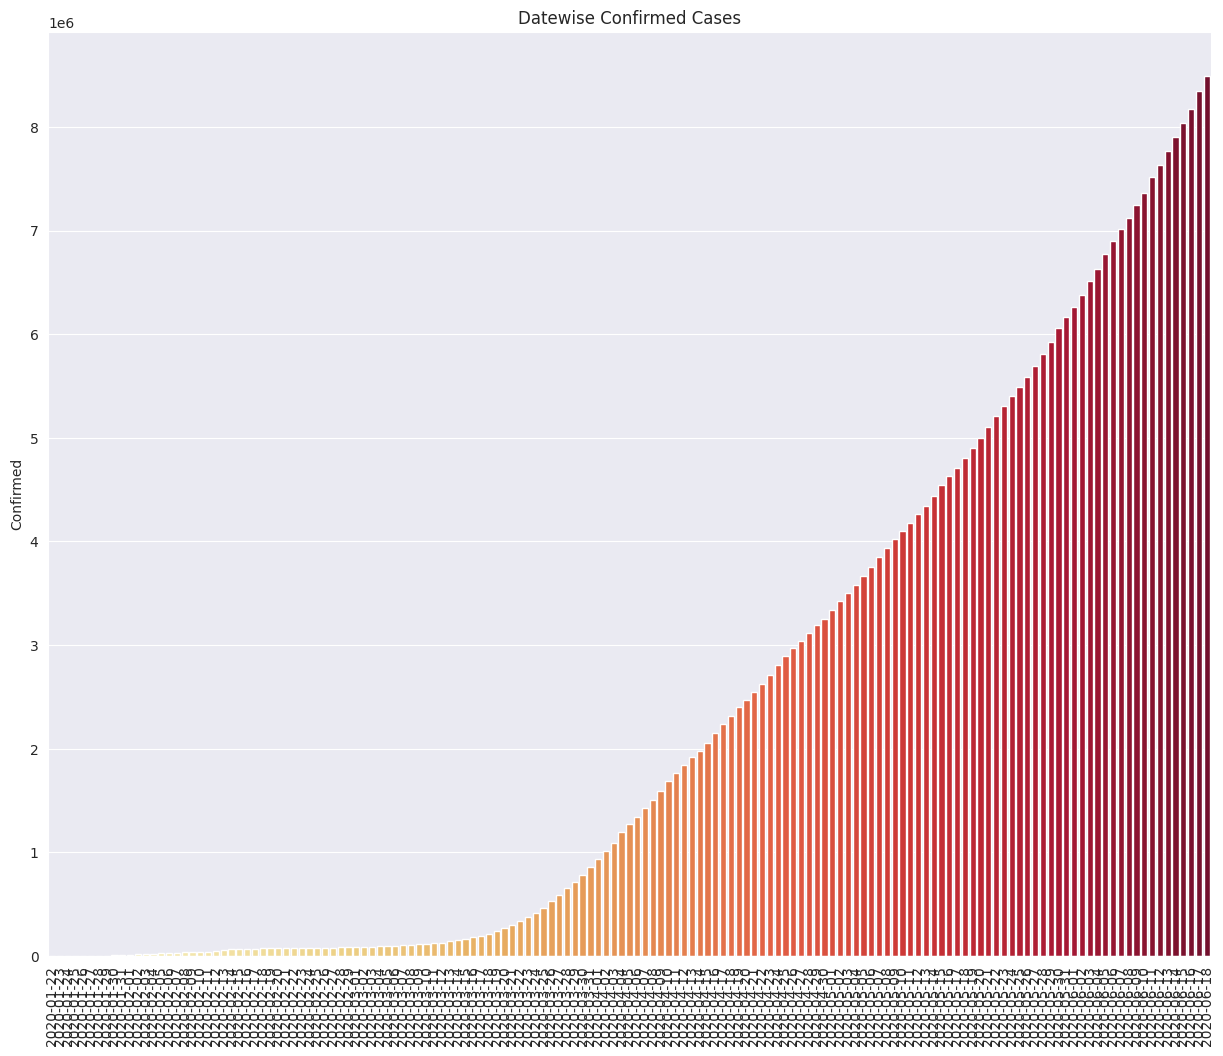

In [25]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,12))
sns.barplot(x = datewise_covid.index.date,y = datewise_covid['Confirmed'],palette='YlOrRd')
plt.xticks(rotation=90)
plt.title('Datewise Confirmed Cases')

In [26]:
#A mortality rate is a measure of the frequency of occurrence of death in a defined population during a specified interval.
datewise_covid['Mortality Rate'] = (datewise_covid['Deaths']/datewise_covid['Confirmed'])*100

In [27]:
datewise_covid.head()

,Confirmed,Deaths,Recovered,Mortality Rate
ObservationDate,,,,
2020-01-22,555.0,17.0,28.0,3.063063
2020-01-23,653.0,18.0,30.0,2.756508
2020-01-24,941.0,26.0,36.0,2.763018
2020-01-25,1438.0,42.0,39.0,2.920723
2020-01-26,2118.0,56.0,52.0,2.644004


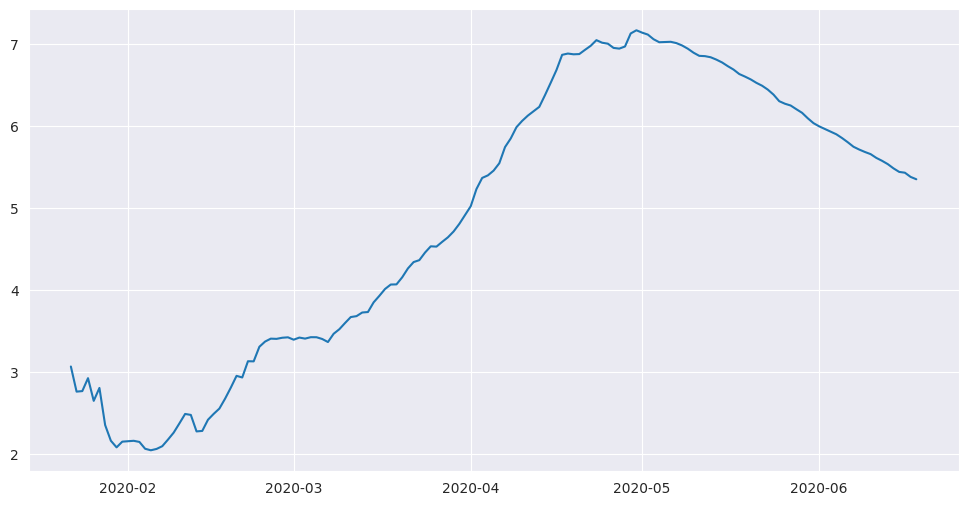

In [28]:
plt.figure(figsize=(12,6))
plt.plot(datewise_covid['Mortality Rate'],label="Mortality Rate")
#plt.xticks(rotation=90)
plt.show()

In [29]:
India_data = covid[covid['Country/Region']=='India']

In [30]:
datewise_india = India_data.groupby(['ObservationDate']).agg({'Confirmed': 'sum','Deaths':'sum','Recovered':'sum'})

In [31]:
datewise_india.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-30,1.0,0.0,0.0
2020-01-31,1.0,0.0,0.0
2020-02-01,1.0,0.0,0.0
2020-02-02,2.0,0.0,0.0
2020-02-03,3.0,0.0,0.0


In [32]:
datewise_india['Mortality Rate'] = (datewise_india['Deaths']/datewise_india['Confirmed'])*100

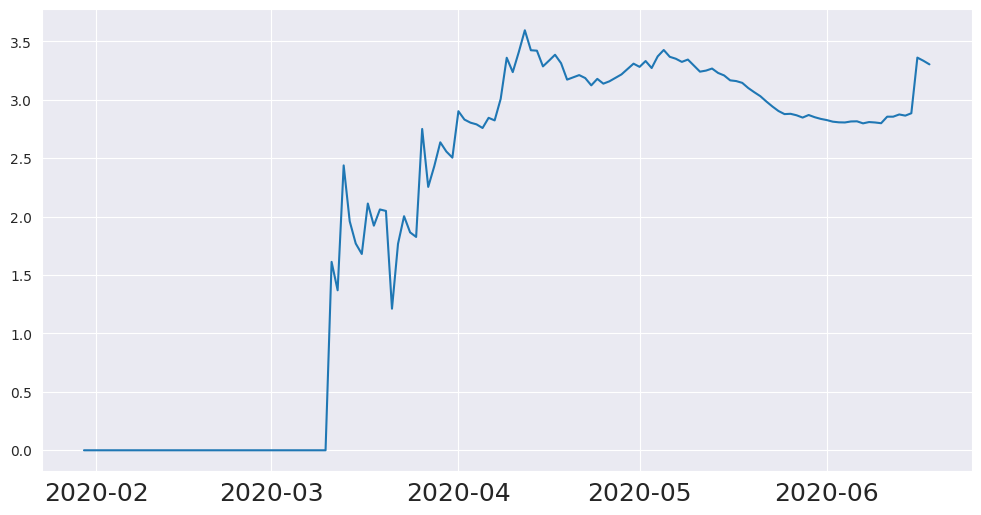

In [33]:
plt.figure(figsize=(12,6))
plt.plot(datewise_india['Mortality Rate'],label="Mortality Rate")
plt.xticks(fontsize=18)
plt.show()

In [34]:
datewise_india['Recovery Rate'] = (datewise_india['Recovered']/datewise_india['Confirmed'])*100

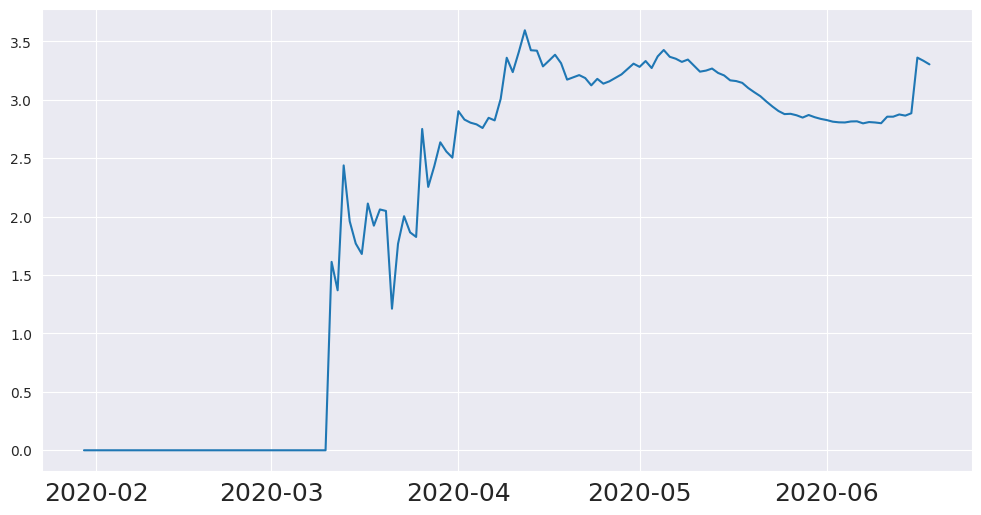

In [35]:
plt.figure(figsize=(12,6))
plt.plot(datewise_india['Mortality Rate'],label="Mortality Rate")
plt.xticks(fontsize=18)
plt.show()

In [36]:
datewise_india['Recovery Rate'] = (datewise_india['Recovered']/datewise_india['Confirmed'])*100

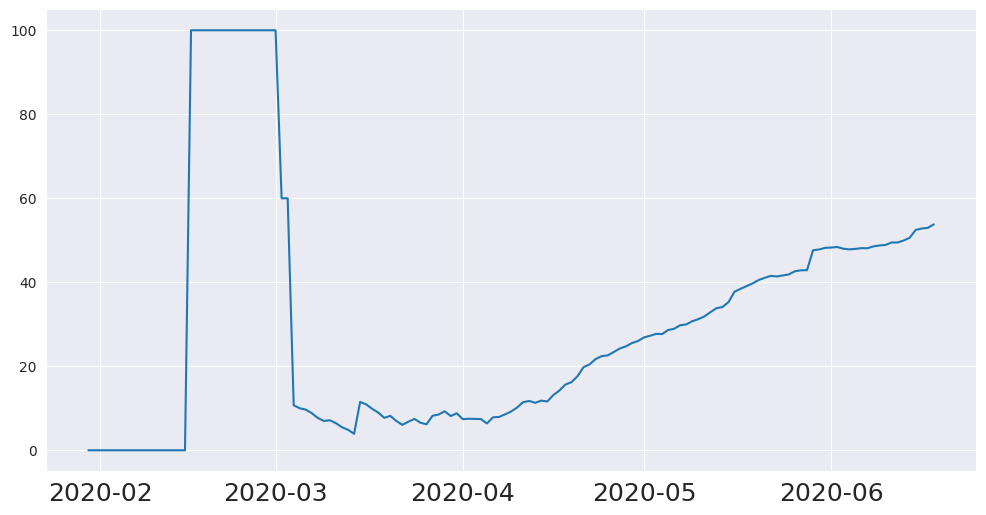

In [37]:
plt.figure(figsize=(12,6))
plt.plot(datewise_india['Recovery Rate'],label="Recovery Rate")
plt.xticks(fontsize=18)
plt.show()

<Axes: xlabel='ObservationDate'>

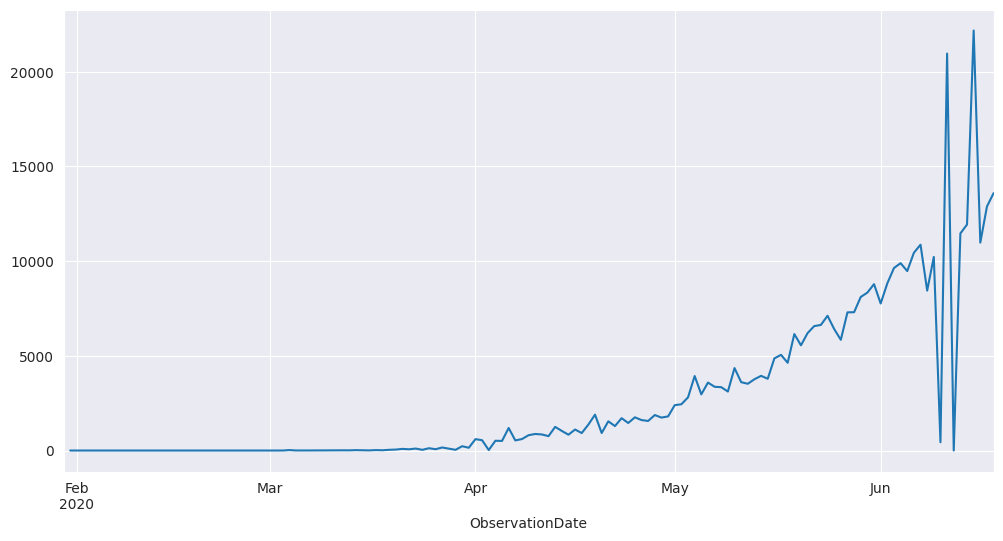

In [43]:
plt.figure(figsize=(12,6))
datewise_india['Confirmed'].diff().plot()

<Axes: xlabel='ObservationDate'>

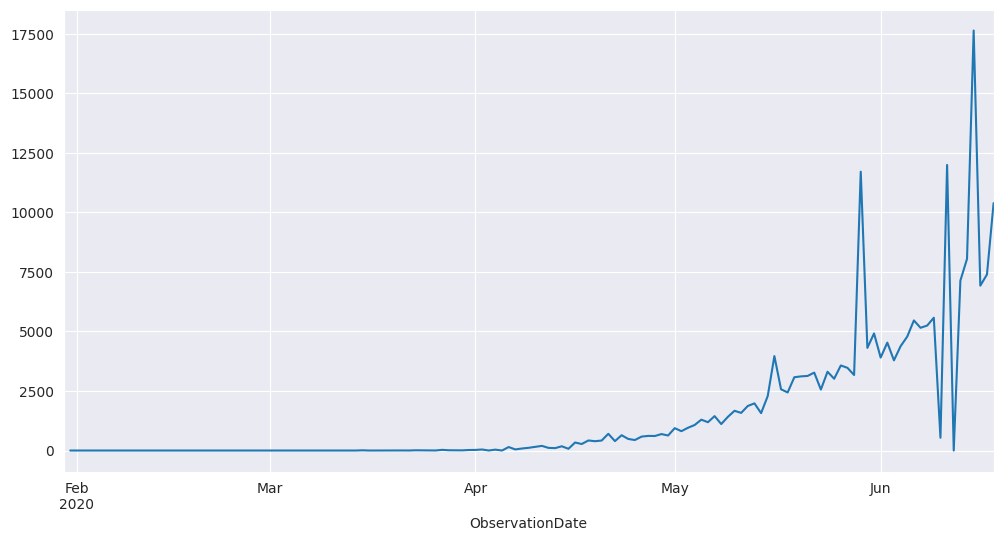

In [39]:
plt.figure(figsize=(12,6))
datewise_india['Recovered'].diff().plot()

<Axes: xlabel='ObservationDate'>

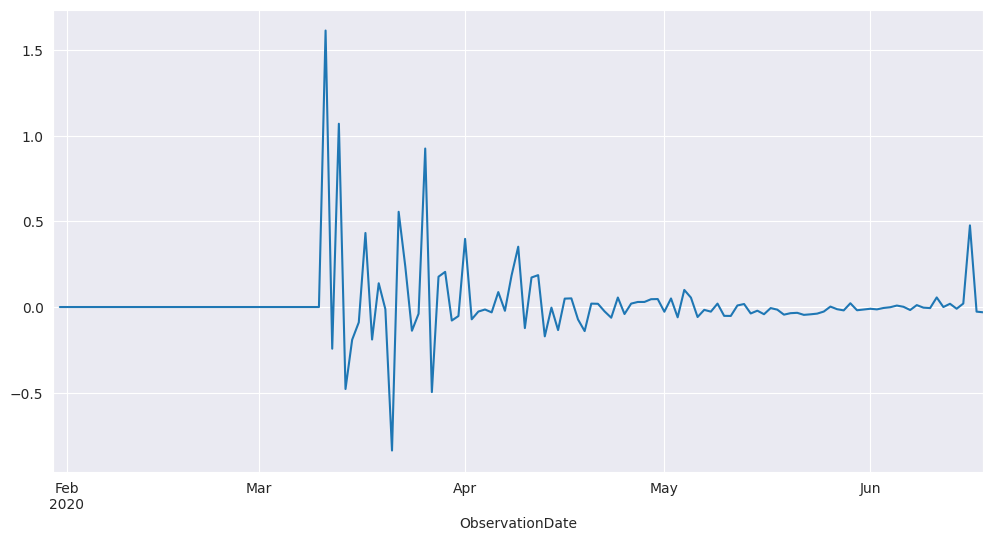

In [40]:
plt.figure(figsize=(12,6))
datewise_india['Mortality Rate'].diff().plot()

<Axes: xlabel='ObservationDate'>

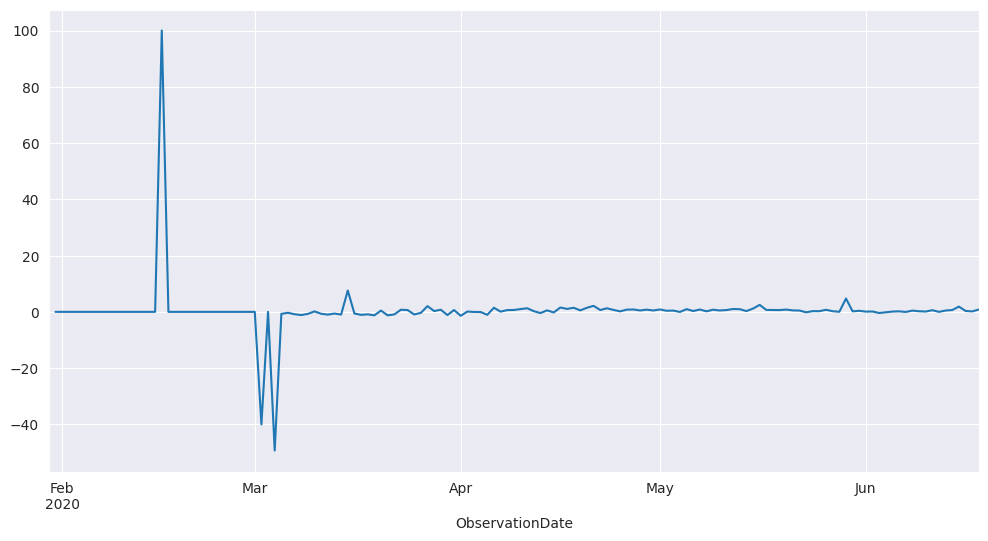

In [41]:
plt.figure(figsize=(12,6))
datewise_india['Recovery Rate'].diff().plot()